In [66]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import math
import fractions
import decimal
import re
import seaborn as sns
import pickle

from music21 import stream, tempo, converter, corpus, instrument, midi, note, chord, pitch, musicxml, meter, key

plt.rcParams["figure.figsize"] = (20,10)

In [8]:
# Load data from encoder script

encoded_part = pd.read_csv("entre_dos_aguas.csv")

with open('tbl_entre_dos_aguas.pickle', 'rb') as handle:
    tbl = pickle.load(handle)
    
with open('inv_tbl_entre_dos_aguas.pickle', 'rb') as handle:
    inv_tbl = pickle.load(handle)
    
with open('lcm.pickle', 'rb') as handle:
    lcm = pickle.load(handle)
    

In [93]:
display(encoded_part)

,Note,Duration,Offset
0,0,384,0
1,56,72,384
2,0,24,456
3,57,72,480
4,0,24,552
5,56,72,576
6,0,24,648
7,57,72,672
8,0,18,744
9,5,6,762


In [87]:
midi_stream = stream.Stream()
guitar_part = stream.Voice()
midi_stream.append(instrument.Guitar())


for index, row in encoded_part.iterrows():
    note_name = inv_tbl[row['Note']]
    if (note_name == 'REST'):
        nt = note.Rest()
    else: 
        if (' ' in note_name):
            nt = chord.Chord(note_name)
        else:
            nt = note.Note(note_name)
    nt.duration.quarterLength = float(row['Duration'])/lcm
    nt.offset = float(row['Offset'])/lcm
    guitar_part.append(nt)

# switch params to being loaded from pickle, instead of being hardcoded   
midi_stream.append(tempo.MetronomeMark(number=192.0))
midi_stream.append(meter.TimeSignature('4/4'))
midi_stream.append(key.Key('G'))


midi_stream.append(guitar_part)


In [88]:
midi_stream.show('text')

{0.0} <music21.instrument.Guitar 'Guitar'>
{0.0} <music21.tempo.MetronomeMark Quarter=192.0>
{0.0} <music21.key.Key of G major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.stream.Voice 0x11eb7e550>
    {0.0} <music21.note.Rest rest>
    {32.0} <music21.chord.Chord C4 E4 G3>
    {38.0} <music21.note.Rest rest>
    {40.0} <music21.chord.Chord A3 D4 F#4>
    {46.0} <music21.note.Rest rest>
    {48.0} <music21.chord.Chord C4 E4 G3>
    {54.0} <music21.note.Rest rest>
    {56.0} <music21.chord.Chord A3 D4 F#4>
    {62.0} <music21.note.Rest rest>
    {63.5} <music21.note.Note G>
    {64.0} <music21.note.Note G>
    {64.5} <music21.note.Note F#>
    {65.0} <music21.note.Note F#>
    {65.5} <music21.note.Note E>
    {66.0} <music21.note.Note E>
    {66.5} <music21.note.Note D>
    {67.5} <music21.note.Note D>
    {68.5} <music21.note.Note C>
    {69.5} <music21.note.Note C>
    {70.0} <music21.note.Note D>
    {70.5} <music21.note.Note E>
    {71.0} <music21.note.Note F#>
    {71.5}

In [89]:
# midi_stream.show('midi')
# fp = midi_stream.write('midi', fp='eda.mid')

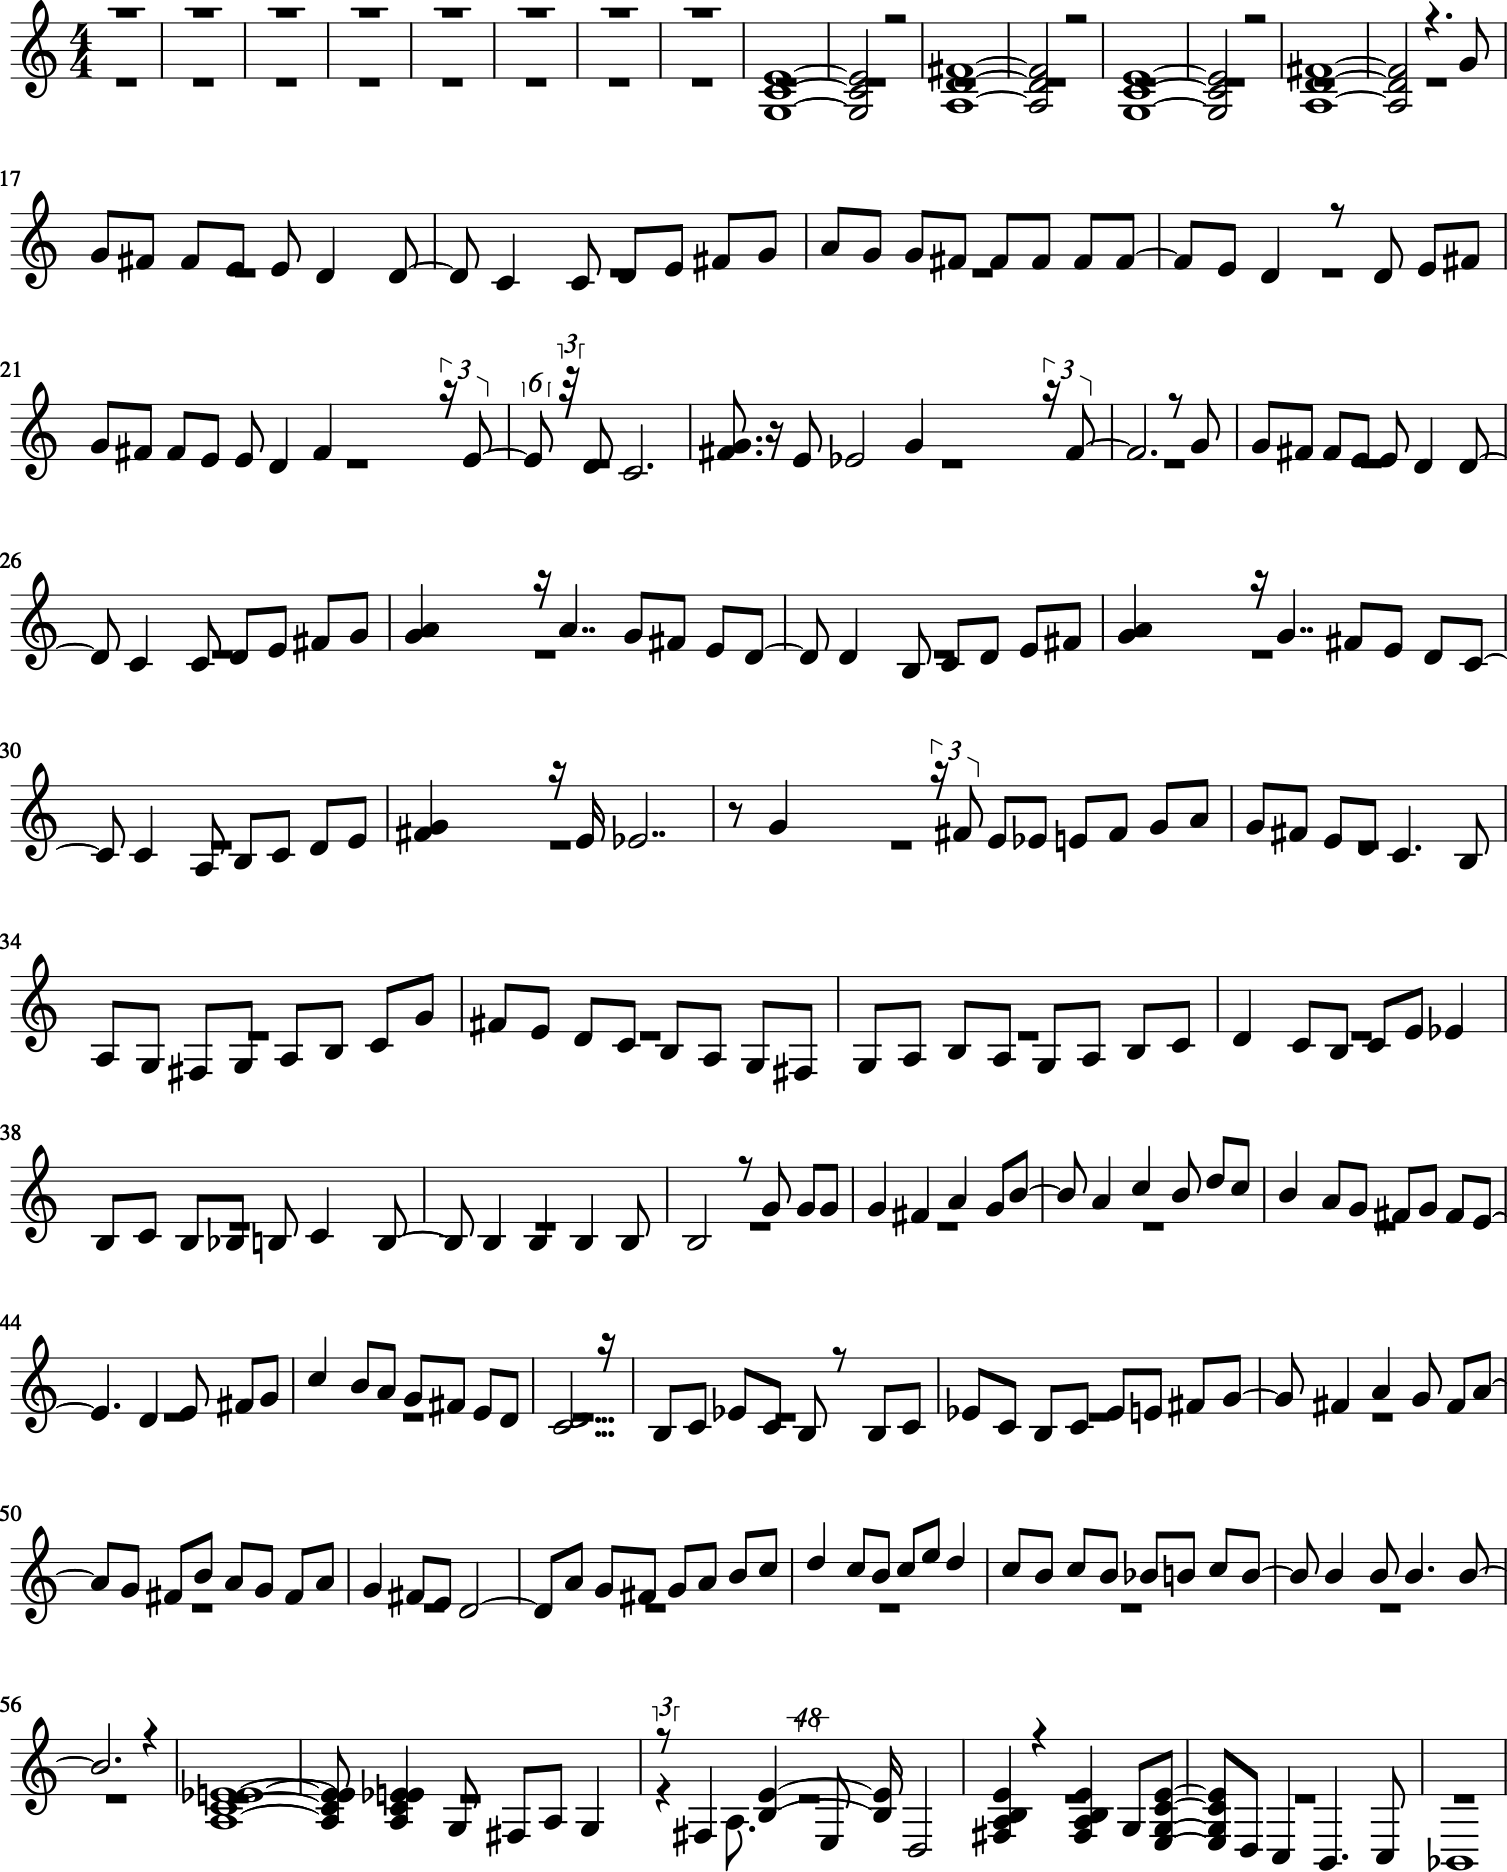

In [23]:
midi_stream.show()